In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
origin = pd.read_csv('D:\\data\\cloudsim\\workload\\planetlab\\20110303\\75-130-96-12_static_oxfr_ma_charter_com_root')

In [3]:
origin.dtypes

4    int64
dtype: object

In [4]:
origin.columns=['load']
origin['load']=origin['load'].astype('float64')
origin.dtypes

load    float64
dtype: object

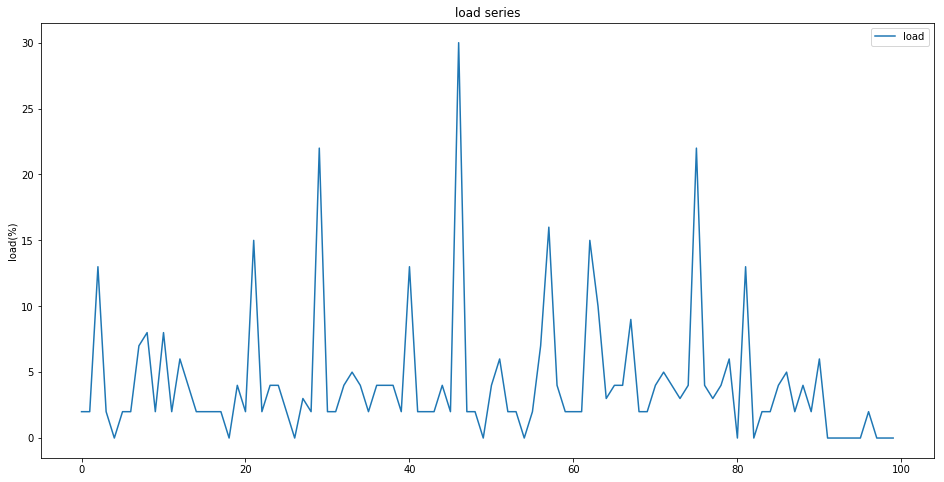

In [5]:
plt.figure(figsize=(16,8))
ls=origin['load']
plt.plot(ls[:100], label='load')
plt.title('load series')
plt.ylabel('load(%)')
plt.legend(loc='best')

In [6]:
# 滞后期为k的序列S的自相关系数
def k_coef(k,n,s):
    s_before = s[:n-k]
    s_after = s[k:]
    return np.corrcoef(s_before,s_after)

import math
# 求自相关系数序列
def k_coefs(s):
    res=[]
    n = s.size
    m = math.ceil(n/3.0)
    for k in range(1,m+1):
        res.append(k_coef(k, n, s)[0,1])
    return np.array(res), len(res)

In [18]:
# 对原始序列进行差分，平稳
diff = origin.diff(periods=1).dropna()

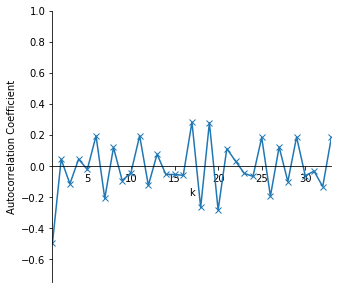

In [22]:
# 绘制前100个数据的自相关系数序列
P, n=k_coefs(diff['load'][1:100])
x = np.arange(1,n+1)
plt.figure(figsize=(5,5))
plt.plot(x, P, label='coef', marker='x')
plt.xlim(1,n) # x轴从1开始
plt.ylim(-0.75,1)
plt.ylabel('Autocorrelation Coefficient')
plt.xlabel('k')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom') 
ax.spines['bottom'].set_position(('data', 0))
plt.savefig('fig/3-7.png')